## 최대 낙폭 (MDD)
- Maximum Draw Down
- 백테스팅 할 때 볼 수 있는 지표 - pain point 알고 싶을 때
- MDD = (1 - (종가 / 전고점)) * 100
- 전고점 -> 일정 기간 동안에 이전에 있었던 최고 점 

In [1]:
import pandas as pd 


In [6]:
# data => dataframe => matplot
# api 
import FinanceDataReader as fdr

kospi = fdr.DataReader('KS11', '2000', '20231231') 
kospi.tail()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2023-12-21,2598.37,2610.81,2587.16,2600.02,578334789,-0.0055,2,-14.28,9467808991589,2.080483e+15
2023-12-22,2617.72,2621.37,2599.51,2599.51,465967201,-0.0002,2,-0.51,8848287882829,2.082856e+15
2023-12-26,2609.44,2612.14,2594.65,2602.59,440428129,0.0012,1,3.08,9582765574870,2.085608e+15
2023-12-27,2599.35,2613.50,2590.08,2613.50,349733378,0.0042,1,10.91,10359763878782,2.093997e+15
2023-12-28,2616.27,2655.28,2611.72,2655.28,460086621,0.0160,1,41.78,9418929602384,2.126373e+15


In [5]:
kospi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5923 entries, 2000-01-04 to 2023-12-28
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5923 non-null   float64
 1   High    5923 non-null   float64
 2   Low     5923 non-null   float64
 3   Close   5923 non-null   float64
 4   Volume  5923 non-null   int64  
 5   Change  5923 non-null   float64
 6   UpDown  5923 non-null   int64  
 7   Comp    5923 non-null   float64
 8   Amount  5923 non-null   int64  
 9   MarCap  5575 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 509.0 KB


In [8]:
kospi['전고점'] = kospi['Close'].cummax()
kospi.tail()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap,전고점
Date,,,,,,,,,,,
2023-12-21,2598.37,2610.81,2587.16,2600.02,578334789,-0.0055,2,-14.28,9467808991589,2.080483e+15,3305.21
2023-12-22,2617.72,2621.37,2599.51,2599.51,465967201,-0.0002,2,-0.51,8848287882829,2.082856e+15,3305.21
2023-12-26,2609.44,2612.14,2594.65,2602.59,440428129,0.0012,1,3.08,9582765574870,2.085608e+15,3305.21
2023-12-27,2599.35,2613.50,2590.08,2613.50,349733378,0.0042,1,10.91,10359763878782,2.093997e+15,3305.21
2023-12-28,2616.27,2655.28,2611.72,2655.28,460086621,0.0160,1,41.78,9418929602384,2.126373e+15,3305.21


In [11]:
# MDD = (1 - (종가 / 전고점)) * 100
kospi['DD'] = (1 - (kospi['Close'] / kospi['전고점'])) * 100
kospi['DD']


Date
2000-01-04     0.000000
2000-01-05     6.867540
2000-01-06     9.277270
2000-01-07    10.423591
2000-01-10     6.779725
                ...    
2023-12-21    21.335709
2023-12-22    21.351140
2023-12-26    21.257953
2023-12-27    20.927868
2023-12-28    19.663804
Name: DD, Length: 5923, dtype: float64

In [12]:
kospi['DD'].max()

55.73727149116181

### Chart 작성

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

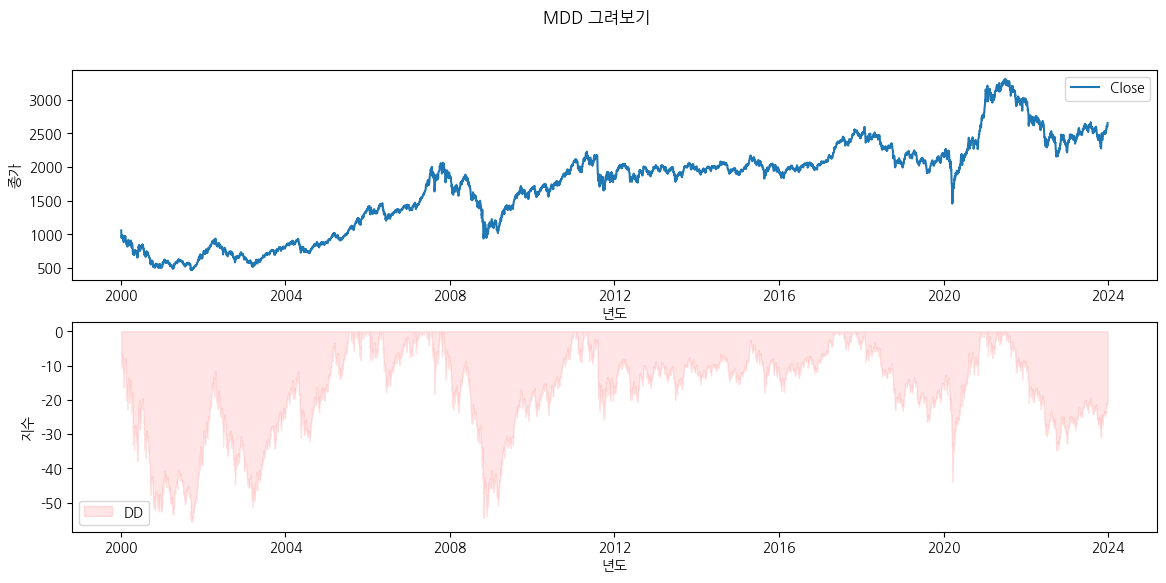

In [22]:

fig, axes = plt.subplots(2,1,figsize=(14,6), dpi=100) # 외곽 사이즈

fig.suptitle('MDD 그려보기')

# 종가
axes[0].plot(kospi.index, kospi['Close'], label='Close' )
axes[0].set_xlabel('년도')
axes[0].set_ylabel('종가')
axes[0].legend()

# MDD
# axes[1].plot(kospi.index, kospi['DD']*-1, label='DD' )
axes[1].fill_between(kospi.index, kospi['DD']*-1, label='DD',alpha=0.1, color='red' )
axes[1].set_xlabel('년도')
axes[1].set_ylabel('지수')
axes[1].legend()

# plt.tight_layout()
plt.show()

MDD 크면 낙폭이 크다 변동성이 크다
기간에 대한 변동성 보는것? 